In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from highlight_text import fig_text
import imageio
from PIL import Image
from mplsoccer import PyPizza, add_image, FontManager

In [24]:
#read in the data
df = pd.read_csv('ChampFBWB2021.csv')

In [25]:
df.head()

,Player,Team,Position,Age,Market value,Contract expires,Matches played,Minutes played,Goals,xA,...,Offensive duels per 90,"Offensive duels won, %",Touches in box per 90,Progressive runs per 90,Passes per 90,"Accurate passes, %",xA per 90,Key passes per 90,Progressive passes per 90,"Accurate progressive passes, %"
0,M. Aarons,Norwich City,RB,22,22000000,2024-06-30,45,4355,2,6.45,...,7.61,48.37,2.13,2.81,43.54,84.39,0.13,0.76,7.27,72.73
1,R. Henry,Brentford,LB,25,20000000,2026-06-30,31,2745,1,1.28,...,6.30,51.56,1.28,2.36,37.70,79.30,0.04,0.36,6.52,64.82
2,L. Kelly,Bournemouth,"LB, LCB",23,12000000,2024-06-30,38,3515,1,3.46,...,4.66,37.91,1.00,1.64,45.86,81.02,0.09,0.31,9.63,65.96
3,N. Collins,Burnley,"RB, RCB",21,10000000,2025-06-30,22,1918,2,0.15,...,3.10,40.91,1.13,1.13,39.84,81.04,0.01,0.09,9.48,73.27
4,D. Spence,Nottingham Forest,"RWB, RB, RW",21,8000000,2024-06-30,38,2277,1,1.41,...,10.43,38.64,1.78,1.94,23.36,73.10,0.06,0.24,3.87,64.29


In [26]:
#Progressive passes
df['Progressive passes'] = df['Accurate progressive passes, %'] /100 * df['Progressive passes per 90']
df = df.round({'Progressive passes': 2})

#Successul dribbles
df['Successful dribbles'] = df['Successful dribbles, %'] /100 * df['Dribbles per 90']
df = df.round({'Successful dribbles': 2})


#Successul crosses
df['Successful crosses'] = df['Accurate crosses, %'] /100 * df['Crosses per 90']
df = df.round({'Successful crosses': 2})

#xA per 100 passes
df['90s'] = df['Minutes played'] /90
df['Successful passes per 90'] = df['Accurate passes, %'] /100 * df['Passes per 90']
df['Completed passes'] =  df['Successful passes per 90'] * df['90s']
df['100 passes'] = df['Completed passes'] / 100
df['xA per 100 passes'] = df['xA'] / df['100 passes']
df = df.round({'xA per 100 passes': 2})


In [27]:
df.head()

,Player,Team,Position,Age,Market value,Contract expires,Matches played,Minutes played,Goals,xA,...,Progressive passes per 90,"Accurate progressive passes, %",Progressive passes,Successful dribbles,Successful crosses,90s,Successful passes per 90,Completed passes,100 passes,xA per 100 passes
0,M. Aarons,Norwich City,RB,22,22000000,2024-06-30,45,4355,2,6.45,...,7.27,72.73,5.29,2.36,1.12,48.388889,36.743406,1777.972590,17.779726,0.36
1,R. Henry,Brentford,LB,25,20000000,2026-06-30,31,2745,1,1.28,...,6.52,64.82,4.23,1.93,1.08,30.500000,29.896100,911.831050,9.118310,0.14
2,L. Kelly,Bournemouth,"LB, LCB",23,12000000,2024-06-30,38,3515,1,3.46,...,9.63,65.96,6.35,0.90,0.79,39.055556,37.155772,1451.139318,14.511393,0.24
3,N. Collins,Burnley,"RB, RCB",21,10000000,2025-06-30,22,1918,2,0.15,...,9.48,73.27,6.95,0.94,0.85,21.311111,32.286336,688.057694,6.880577,0.02
4,D. Spence,Nottingham Forest,"RWB, RB, RW",21,8000000,2024-06-30,38,2277,1,1.41,...,3.87,64.29,2.49,2.25,0.47,25.300000,17.076160,432.026848,4.320268,0.33


In [28]:
df = df.drop(['Team','Position','Age','Market value','Contract expires','Matches played','Minutes played','Goals', 'Accurate passes, %','Aerial duels per 90', 'xA', '90s', 'Successful passes per 90', 'Completed passes', '100 passes'],axis=1)



In [29]:
df.head()

,Player,Defensive duels per 90,"Defensive duels won, %","Aerial duels won, %",PAdj Interceptions,Crosses per 90,"Accurate crosses, %",Dribbles per 90,"Successful dribbles, %",Offensive duels per 90,...,Progressive runs per 90,Passes per 90,xA per 90,Key passes per 90,Progressive passes per 90,"Accurate progressive passes, %",Progressive passes,Successful dribbles,Successful crosses,xA per 100 passes
0,M. Aarons,4.51,62.84,35.77,5.60,3.00,37.24,4.07,57.87,7.61,...,2.81,43.54,0.13,0.76,7.27,72.73,5.29,2.36,1.12,0.36
1,R. Henry,6.66,66.50,42.06,6.02,3.02,35.87,2.95,65.56,6.30,...,2.36,37.70,0.04,0.36,6.52,64.82,4.23,1.93,1.08,0.14
2,L. Kelly,6.81,67.29,57.66,7.07,1.87,42.47,1.72,52.24,4.66,...,1.64,45.86,0.09,0.31,9.63,65.96,6.35,0.90,0.79,0.24
3,N. Collins,6.52,64.75,70.59,7.66,1.60,52.94,1.60,58.82,3.10,...,1.13,39.84,0.01,0.09,9.48,73.27,6.95,0.94,0.85,0.02
4,D. Spence,5.06,60.16,39.19,5.88,2.53,18.75,4.82,46.72,10.43,...,1.94,23.36,0.06,0.24,3.87,64.29,2.49,2.25,0.47,0.33


In [30]:
#Metric Name Adjustments
df['Offensive duels'] = df['Offensive duels per 90'] 
df['Touches in box'] = df['Touches in box per 90'] 
df['Progressive runs'] = df['Progressive runs per 90'] 
df['Expected assists'] = df['xA per 90']
df['Key passes'] = df['Key passes per 90'] 
df['Defensive duels'] = df['Defensive duels per 90'] 

In [31]:
#Organise metric order for chart

df = df.filter(['Player','Successful crosses','Successful dribbles','Offensive duels','Offensive duels won, %','Touches in box','Progressive runs','Progressive passes','xA per 100 passes','Key passes','Defensive duels','Defensive duels won, %','Aerial duels won, %','PAdj Interceptions'], axis=1)



In [32]:
#Rename metrics for visual
df.columns = ['Player','Successful Crosses', 'Successful Dribbles', 'Offensive Duels', 'Offensive Duels\nWon %', 'Touches In Box', 'Progressive Runs', 'Progressive Passes', 'xA Per 100\nPasses', 'Key Passes', 'Defensive Duels', 'Defensive Duel\nSuccess %', 'Aerial Duel\nSuccess %', 'PAdj Interceptions']



In [33]:
df.head()

,Player,Successful Crosses,Successful Dribbles,Offensive Duels,Offensive Duels\nWon %,Touches In Box,Progressive Runs,Progressive Passes,xA Per 100\nPasses,Key Passes,Defensive Duels,Defensive Duel\nSuccess %,Aerial Duel\nSuccess %,PAdj Interceptions
0,M. Aarons,1.12,2.36,7.61,48.37,2.13,2.81,5.29,0.36,0.76,4.51,62.84,35.77,5.60
1,R. Henry,1.08,1.93,6.30,51.56,1.28,2.36,4.23,0.14,0.36,6.66,66.50,42.06,6.02
2,L. Kelly,0.79,0.90,4.66,37.91,1.00,1.64,6.35,0.24,0.31,6.81,67.29,57.66,7.07
3,N. Collins,0.85,0.94,3.10,40.91,1.13,1.13,6.95,0.02,0.09,6.52,64.75,70.59,7.66
4,D. Spence,0.47,2.25,10.43,38.64,1.78,1.94,2.49,0.33,0.24,5.06,60.16,39.19,5.88


In [34]:
#get parameters
params = list(df.columns)
params = params[1:]
params

['Successful Crosses',
 'Successful Dribbles',
 'Offensive Duels',
 'Offensive Duels\nWon %',
 'Touches In Box',
 'Progressive Runs',
 'Progressive Passes',
 'xA Per 100\nPasses',
 'Key Passes',
 'Defensive Duels',
 'Defensive Duel\nSuccess %',
 'Aerial Duel\nSuccess %',
 'PAdj Interceptions']

In [35]:
newdf = df

In [36]:
newdf

,Player,Successful Crosses,Successful Dribbles,Offensive Duels,Offensive Duels\nWon %,Touches In Box,Progressive Runs,Progressive Passes,xA Per 100\nPasses,Key Passes,Defensive Duels,Defensive Duel\nSuccess %,Aerial Duel\nSuccess %,PAdj Interceptions
0,M. Aarons,1.12,2.36,7.61,48.37,2.13,2.81,5.29,0.36,0.76,4.51,62.84,35.77,5.60
1,R. Henry,1.08,1.93,6.30,51.56,1.28,2.36,4.23,0.14,0.36,6.66,66.50,42.06,6.02
2,L. Kelly,0.79,0.90,4.66,37.91,1.00,1.64,6.35,0.24,0.31,6.81,67.29,57.66,7.07
3,N. Collins,0.85,0.94,3.10,40.91,1.13,1.13,6.95,0.02,0.09,6.52,64.75,70.59,7.66
4,D. Spence,0.47,2.25,10.43,38.64,1.78,1.94,2.49,0.33,0.24,5.06,60.16,39.19,5.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,J. Rafferty,0.87,0.62,1.86,63.33,0.19,0.31,8.01,0.40,0.25,6.02,60.82,53.73,6.73
82,M. Cranie,0.29,0.58,2.80,53.45,0.43,0.68,6.43,0.10,0.10,8.16,58.58,54.17,6.86
83,J. Jacobson,0.77,0.44,2.01,52.56,0.10,0.59,6.69,1.17,0.05,7.55,54.95,54.65,8.15
84,A. Rowe,0.50,3.53,10.43,41.94,1.51,2.19,2.44,0.22,0.08,6.48,53.25,20.83,5.88


In [37]:
newdf.Player.unique()

array(['M. Aarons', 'R. Henry', 'L. Kelly', 'N. Collins', 'D. Spence',
       'O. Richards', 'S. van den Berg', 'D. Giannoulis', 'C. Styles',
       'L. Buchanan', 'J. Ngakia', 'J. Stacey', 'Diego Rico', 'N. Kebano',
       'S. McCallum', 'A. Masina', 'K. Pedersen', 'A. Dijksteel',
       'H. Toffolo', 'A. Reach', 'M. Roerslev', 'C. Roberts', 'J. Bree',
       'R. Nyambe', 'Kiko Femenía', 'R. Manning', 'R. Giles', 'P. Ng',
       'Pipa', 'Xavi Quintillà', 'M. Romeo', 'M. Bola', 'A. Bell',
       'J. Bidwell', 'L. Bacuna', 'T. Smith', 'J. Tymon',
       'R. Norrington-Davies', 'M. Johnson', 'A. Smith', 'J. Hunt',
       'M. Colin', 'J. Sørensen', 'S. Sessegnon', 'S. Malone',
       'M. Wallace', 'Tomás Esteves', 'N. Byrne', 'A. Hughes',
       'A. Yiadom', 'C. Christie', 'K. Harris', 'K. Naismith',
       'H. Dalsgaard', 'L. Palmer', 'C. Brittain', 'F. Dabo', 'T. Kane',
       'J. Rankin-Costello', 'T. Holmes', 'M. Odubajo', 'J. Bennett',
       'D. McNamara', 'G. Cunningham', 'W. Hardi

In [38]:
#add ranges to list of tuple pairs
ranges = []
a_values = []
b_values = []

for x in params:
    a = min(df[params][x])
    
    b = max(df[params][x])

    ranges.append((a,b))
    
#CHANGE PLAYER FOR RADAR     
for x in range(len(newdf['Player'])):
    if newdf['Player'][x] == 'R. Nyambe':
        a_values = newdf.iloc[x].values.tolist()
    if newdf['Player'][x] == 'C. Brittain':
        b_values = newdf.iloc[x].values.tolist()
        
a_values = a_values[1:]
b_values = b_values[1:]

values = [a_values, b_values]

In [39]:
ranges

[(0.15, 2.15),
 (0.17, 4.57),
 (1.38, 13.28),
 (26.47, 63.53),
 (0.1, 2.35),
 (0.31, 3.19),
 (2.38, 10.56),
 (0.02, 1.56),
 (0.0, 0.76),
 (3.87, 10.34),
 (46.88, 72.18),
 (17.39, 72.5),
 (2.61, 10.09)]

In [40]:
values

[[0.56,
  1.96,
  6.33,
  47.14,
  0.81,
  1.56,
  3.37,
  0.23,
  0.39,
  8.23,
  67.46,
  54.47,
  7.76],
 [1.06,
  2.08,
  6.89,
  39.02,
  1.13,
  1.11,
  7.74,
  0.48,
  0.32,
  6.66,
  63.39,
  42.97,
  7.08]]

In [43]:
## endnote 
endnote = "Graphic: @HenshawAnalysis\n Template: Fullback / Wingback\n Notes: 1000+ mins | All units are per 90mins | Data is via Wyscout"

#title 

title = dict(
    title_name='Ryan Nyambe',
    title_color = '#D42133',
    subtitle_name = 'Blackburn Rovers\nChampionship, 2020-21',
    subtitle_color = 'black',
    title_name_2='Callum Brittain',
    title_color_2 = '#253364',
    subtitle_name_2 = 'Barnsley\nChampionship, 2020-21',
    subtitle_color_2 = 'black',
    title_fontsize = 24,
    subtitle_fontsize=16
)


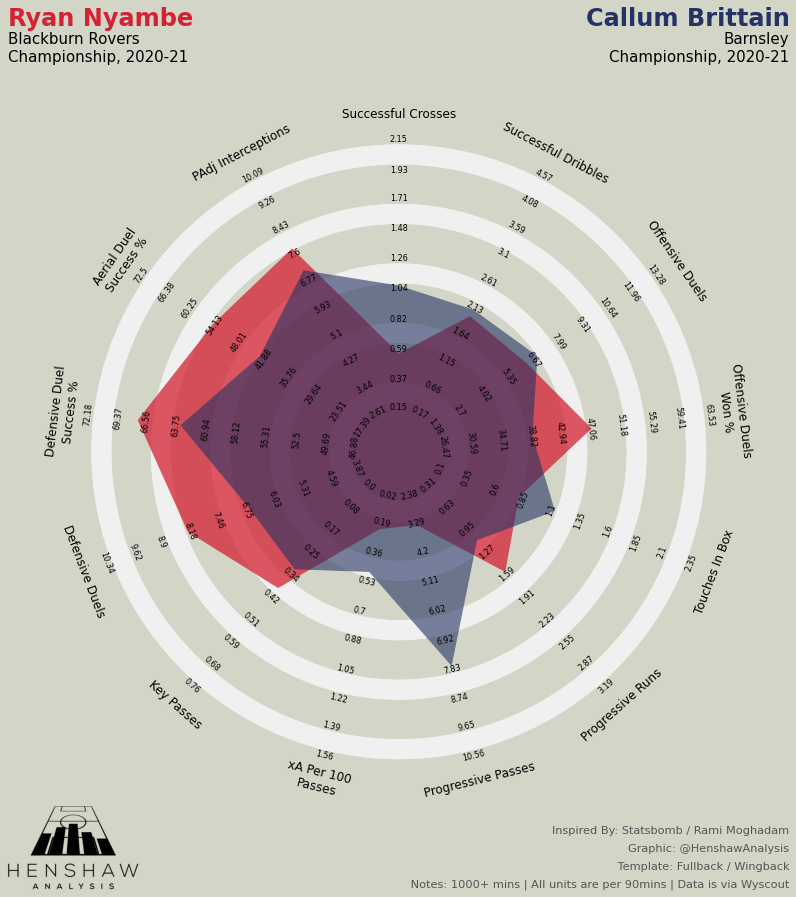

In [44]:
## make a subplot
fig, ax = plt.subplots(figsize=(14,18), facecolor="#D3D6C7")

radar = Radar(background_color="#D3D6C7", patch_color="#F0F0F0", label_color="black",
              range_color="black", label_fontsize=12, range_fontsize=8)

fig, ax = radar.plot_radar(ranges=ranges,params=params,values=values, 
                         radar_color=['#D42133','#253364'],
                         alphas=[.75,.6],figax=(fig,ax), endnote=endnote, end_size=11.3, end_color="#545454", title=title,
                         compare=True)

im2 = imageio.imread('HenshawAnalysis_Logo.png')

# add image
ax_image = add_image(
    im2, fig, left=0.124, bottom=0.12, width=0.13, height=0.127
)   # these values might differ when you are plotting

plt.show()

